In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [27]:
# Matriz de Confusão fornecida
conf_matrix = np.array([[0.26, 0.03, 0.01, 0.02, 0.28],
                        [0.00, 0.87, 0.01, 0.07, 0.12],
                        [0.00, 0.00, 0.00, 0.64, 0.35],
                        [0.44, 0.01, 0.00, 0.81, 0.22],
                        [0.00, 0.01, 0.02, 0.00, 0.00]])


In [28]:
# Definindo as classes verdadeiras e previstas (exemplo)
y_true = np.array([0, 1, 2, 3, 4])
y_pred = np.array([0, 1, 2, 3, 4])

In [29]:
# Funções para calcular métricas
def calculate_metrics(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)

    # Acurácia
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Precisão
    precision = TP / (TP + FP)

    # Sensibilidade (Recall)
    recall = TP / (TP + FN)

    # Especificidade
    specificity = TN / (TN + FP)

    # F-score
    precision = np.nan_to_num(precision)  # Substitui NaN e inf por 0
    recall = np.nan_to_num(recall)      # Substitui NaN e inf por 0

    f1 = np.where((precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0)


    return accuracy, precision, recall, specificity, f1

accuracy, precision, recall, specificity, f1 = calculate_metrics(conf_matrix)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade:", recall)
print("Especificidade:", specificity)
print("F1 Score:", f1)

Acurácia: [0.81294964 0.94004796 0.7529976  0.66426859 0.76019185]
Precisão: [0.37142857 0.94565217 0.         0.52597403 0.        ]
Sensibilidade: [0.43333333 0.81308411 0.         0.5472973  0.        ]
Especificidade: [0.8767507  0.98387097 0.98742138 0.72862454 0.76570048]
F1 Score: [0.4        0.87437186 0.         0.53642384 0.        ]


<ipython-input-29-5ba5609c6797>:24: RuntimeWarning: invalid value encountered in divide
  f1 = np.where((precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0)


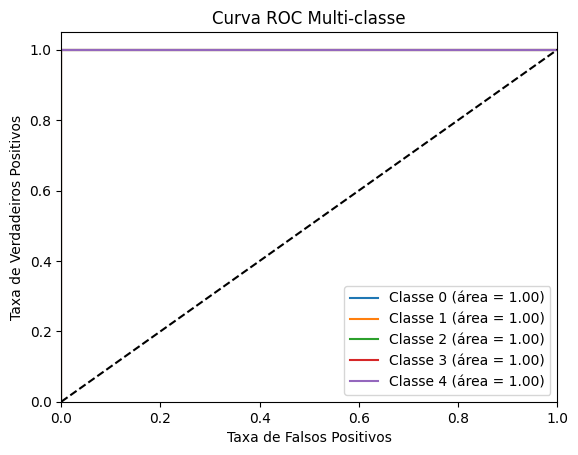

In [30]:
# Plotando a Curva ROC
def plot_roc_curve(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(y_true))):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred == i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(len(np.unique(y_true))):
        plt.plot(fpr[i], tpr[i], label=f'Classe {i} (área = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC Multi-classe')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_true, y_pred)